In [156]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [157]:
def load_dataset(csv_path):
    df = pd.read_csv(csv_path, sep=';')
    required_columns = ['Azimuth', 'Altitude', 'Timestamp']

    if not all (col in df.columns for col in required_columns):
        raise ValueError("Required columns are not present in the DataFrame.")
    

    X = df[['Azimuth', 'Timestamp']].values
    y = df[['Azimuth', 'Altitude']].values
    return X, y, df

In [158]:
csv_path = 'cleaned/cleaned_data_quartal_1_2020.csv'
X, y, df = load_dataset(csv_path)

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

In [161]:
timesteps = 1
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], timesteps, X_test_scaled.shape[1]))

In [162]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(timesteps, X_test_scaled.shape[1])))
model.add(Dense(units=2))  # Output layer dengan 2 neuron untuk Azimuth dan Altitude

model.compile(optimizer='adam', loss='mse')  # Pilih optimizer dan fungsi loss yang sesuai


In [163]:
model.fit(X_train_scaled.reshape((X_train_scaled.shape[0], timesteps, X_train_scaled.shape[1])), y_train_scaled, epochs=50, batch_size=32)

Epoch 1/50
328/328 [==============================] - 4s 8ms/step - loss: 0.0900
Epoch 2/50
328/328 [==============================] - 2s 7ms/step - loss: 0.0390
Epoch 3/50
328/328 [==============================] - 2s 7ms/step - loss: 0.0373
Epoch 4/50
328/328 [==============================] - 2s 7ms/step - loss: 0.0371
Epoch 5/50
328/328 [==============================] - 2s 7ms/step - loss: 0.0371
Epoch 6/50
328/328 [==============================] - 2s 7ms/step - loss: 0.0370
Epoch 7/50
328/328 [==============================] - 2s 7ms/step - loss: 0.0369
Epoch 8/50
328/328 [==============================] - 2s 7ms/step - loss: 0.0368
Epoch 9/50
328/328 [==============================] - 3s 8ms/step - loss: 0.0366
Epoch 10/50
328/328 [==============================] - 3s 9ms/step - loss: 0.0362
Epoch 11/50
328/328 [==============================] - 2s 7ms/step - loss: 0.0354
Epoch 12/50
328/328 [==============================] - 2s 7ms/step - loss: 0.0347
Epoch 13/50
328/328 [====

In [164]:
predicted_values_scaled = model.predict(X_test_reshaped)

82/82 [==============================] - 0s 2ms/step


In [165]:
predicted_values = scaler_y.inverse_transform(predicted_values_scaled)

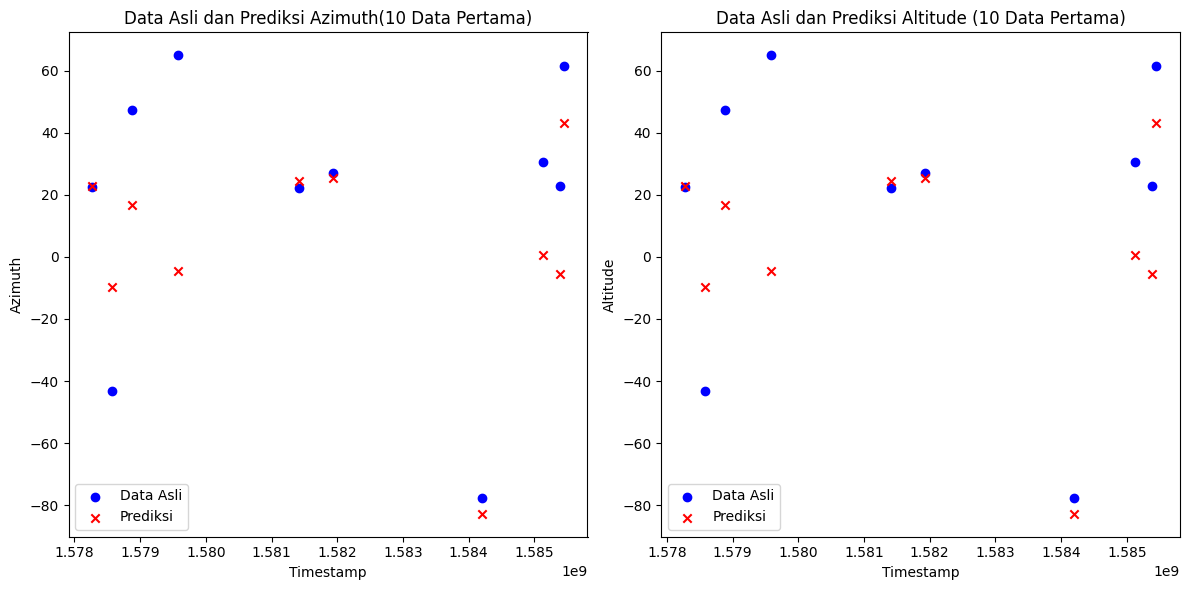

In [173]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.scatter(X_test[:10, 1], y_test[:10, 1], c='blue', label='Data Asli')
plt.scatter(X_test[:10, 1], predicted_values[:10, 1], c='red', marker='x', label='Prediksi')
plt.xlabel('Timestamp')
plt.ylabel('Azimuth')
plt.title('Data Asli dan Prediksi Azimuth(10 Data Pertama)')
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(X_test[:10, 1], y_test[:10, 1], c='blue', label='Data Asli')
plt.scatter(X_test[:10, 1], predicted_values[:10, 1], c='red', marker='x', label='Prediksi')
plt.xlabel('Timestamp')
plt.ylabel('Altitude')
plt.title('Data Asli dan Prediksi Altitude (10 Data Pertama)')
plt.legend()

plt.tight_layout()
plt.show()